In [9]:
import pandas as pd
import numpy as np
import ast
import csv
import time

# The import order is important
import matplotlib as mpl 
mpl.use('cairo') 
%matplotlib inline 
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import graph_tool.all as gt
from numpy.random import seed, random
from scipy.linalg import norm

/Users/happygirlzt/anaconda3/lib/python3.7/site-packages/graph_tool/draw/cairo_draw.py:1494: RuntimeWarning: Error importing Gtk module: No module named 'gi'; GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)


In [4]:
g=gt.Graph()

In [5]:
# Build the Graph


In [10]:
users=np.zeros((40001,1))

In [11]:
users.shape

(40001, 1)

In [12]:
user_friends={}

In [13]:
max_friends=0
min_friends=200000

In [14]:
def hasMoreTags(s):
    return s[-1]!=']'

In [15]:
user_tags={}

# Generate User: Tags dict

In [16]:
start=time.time()
with open('data/data.csv', 'r') as infile:
    reader = csv.reader(infile)
    count=-1
    
    for row in reader:
        #print(row[:7])
        count += 1
        if count == 0:
            continue
        id=row[0]
        #print(count)
        users[count-1][0]=id
        screenName=row[1]
        
        many_tags=hasMoreTags(row[2])
        
        offset=0
        #print('{} originally'.format(row[2]))
        #print(row[3])
        if many_tags:
            this_tags=[]
            for j in range(20):
                this_tags.append(row[2+j].strip('[]').strip(''))
                if row[2+j][-1]==']':
                    break
            #print('{} many tags'.format(this_tags))
            user_tags[id]=this_tags
            offset=len(this_tags)-1
            #print(offset)
        else:
            user_tags[id]=row[2].strip('[]').strip('')
            
        #followersCount=row[4]
        #print(offset)
        friendsCount=int(row[5+offset])
        #print(row[5+offset])
        max_friends=max(max_friends,friendsCount)
        min_friends=min(min_friends,friendsCount)
        friends=row[9+offset:]
        friends[0]=friends[0].strip('[]')
        friends[-1]=friends[-1].strip('[]')
        friends=[i.replace('"', '') for i in friends]
        friends=[i.strip() for i in friends]
        user_friends[id]=friends
        #print("{} : {}".format(count, friends))
end=time.time()
print('{} seconds'.format(end-start))

15.89142894744873 seconds


In [13]:
print(max_friends)
print(min_friends)

238749
101


In [14]:
# dict(list(user_friends.items())[0:2])

In [15]:
# dict(list(user_tags.items())[0:110])

# Generate/Read all tags

In [16]:
import re
def remove_hashtag(raw_str):
  return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",raw_str).split())

In [17]:
try:
  all_tags=pd.read_csv('data/all_tags_saved.csv')
except:
  all_tags=set()

  for u in user_tags:
    tags=user_tags[u]

    if type(tags) == str:
      all_tags.add(remove_hashtag(tags))
    else:
      for tag in tags:
        all_tags.add(remove_hashtag(tag))

  pd.DataFrame(list(all_tags)).to_csv('data/all_tags_saved.csv')

In [18]:
len(all_tags)

128

# Generate Tag: User dict

In [19]:
tag_users={}

In [20]:
for u in user_tags:
  tags=user_tags[u]
  if type(tags)==str:
    normalized_tag=remove_hashtag(tags)
    if normalized_tag in tag_users:
      cur_tags=tag_users[normalized_tag]
      cur_tags.append(u)
      tag_users[normalized_tag]=cur_tags
    else:
      cur_tags=[]
      cur_tags.append(u)
      tag_users[normalized_tag]=cur_tags
  else:
    for tag in tags:
      normalized_tag=remove_hashtag(tag)
      if normalized_tag in tag_users:
        cur_tags=tag_users[normalized_tag]
        cur_tags.append(u)
        tag_users[normalized_tag]=cur_tags
      else:
        cur_tags=[]
        cur_tags.append(u)
        tag_users[normalized_tag]=cur_tags

In [21]:
len(tag_users)

128

In [22]:
x=list(tag_users.keys())

In [23]:
y=[len(item) for item in tag_users.values()]

In [24]:
tag_nums=pd.DataFrame({'tags':x,'num':y})

In [25]:
tag_nums

,tags,num
0,nationaldogday,30513
1,narcos,269
2,gloryoutnow,600
3,veranomtv2016,29
4,felipe massa,45
...,...,...
123,amatrice,2
124,yellen,2
125,pasalic,1
126,jorgesurprise,1


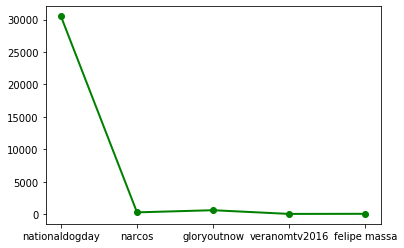

In [26]:
plt.plot(x[:5], y[:5],'go-', label='line 1', linewidth=2)

In [27]:
# Generate the nodes and edges
nodes=user_friends.keys()

In [28]:
len(nodes)

40000

In [29]:
#node_names=[]

In [30]:
# Generate the node names
#with open('/content/drive/My Drive/data.csv', 'r') as infile:
#    reader = csv.reader(infile)
#    count=-1
    
#    for row in reader:
#        count+=1
#        if count==0:
#            continue
#        node_names.append(row[1])

In [31]:
# node_names

In [32]:
try:
    print('Found it')
    g=gt.load_graph('my_graph.xml.gz')
    
except:
    # Generate the edges
    start=time.time()
    
    edge_tuples=[]
    for u in user_friends:
        for v in user_friends[u]:
            edge_tuples.append(tuple((u,v)))
            #g.add_edge(u,v)
    end=time.time()
    
    print('{} seconds'.format(end-start))
    start=time.time()
    print('Begining Add Edges at {}'.format(start))
    g.add_edge_list(edge_tuples,hashed=True,string_vals=True)
    end=time.time()
    print('Finished at {}'.format(end))

10.222814321517944 seconds
Begining Add Edges at 1584451655.679569
Finished at 1584451713.1467688


In [68]:
vertices_count=len(list(g.vertices()))
print('The total number of vertexes is {}'.format(vertices_count))

The total number of vertexes is 12891798


In [69]:
edges_count=len(list(g.edges()))
print('The total number of edges is {}'.format(edges_count))

The total number of edges is 32887245


In [ ]:
# edges

In [34]:
#isinstance(edges[1][0],str)

In [35]:
#edges_pd=pd.DataFrame()

In [36]:
#pd.DataFrame(edges,dtype='str').to_csv('data/edges_str.csv')

In [37]:
#test_str=pd.read_csv('data/edges_str.csv')
#test_str.dtypes

In [38]:
#test=pd.read_csv('data/edges.csv')

In [39]:
#test.dtypes

In [40]:
# Save the graph
# g.save("my_graph.xml.gz")

In [41]:
# Draw the picture
# gt.graph_draw(g,outpath='output.pdf')

In [51]:
count=0
#for u in g.vertices():
sp_mat=gt.shortest_distance(g, source=1)

In [71]:
shortest_dis=[]
count=0
for u in range(vertices_count):
    for v in range(u+1,vertices_count):
        count+=1
        if count%100==0:
            print('Calculated {} pairs'.format(count))
        shortest_dis.append(gt.shortest_distance(g, source=g.vertex(u),target=g.vertex(v)))

Calculated 100 pairs
Calculated 200 pairs
Calculated 300 pairs
Calculated 400 pairs
Calculated 500 pairs
Calculated 600 pairs
Calculated 700 pairs
Calculated 800 pairs
Calculated 900 pairs
Calculated 1000 pairs
Calculated 1100 pairs
Calculated 1200 pairs
Calculated 1300 pairs
Calculated 1400 pairs


KeyboardInterrupt: 

In [72]:
mat=

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 2147483647,
 21474

# Calculate the shortest paths between two nodes

In [ ]:
for vertex in graph.vertices():

In [ ]:
sampled_users=np.random.choice(users, sample_size)

In [ ]:
# Get the minimum distances
has_no_paths=set() # a node may be unreachable to many other nodes
all_shortest_dis=[] # without nodes specified
all_shortest_dis_between_two_nodes={} # with nodes

In [ ]:
print(sampled_users)

In [ ]:
# General Distances
def calculate_distance(sampled_users,G,has_no_paths,all_shortest_dis_between_two_nodes,all_shortest_dis,sampled):
    count=0
    begin=time.time()
    size=len(sampled_users)
    if sampled:
      size=sampled_users.shape[0]

    for u in range(size):
        for v in range(u+1, size):
            count+=1
            if count%100==0:
              print('Calculated {} pairs'.format(count))

            node_u=sampled_users[u]
            node_v=sampled_users[v]
            
            try:
              cur_dis=nx.shortest_path_length(G,source=node_u,target=node_v)
              all_shortest_dis.append(cur_dis)
              all_shortest_dis_between_two_nodes[(node_u,node_v)]=cur_dis
            except:
              has_no_paths.add((node_u,node_v))

    end=time.time()
    print('Spent {} seconds, calculated {} pairs'.format(end-begin,count))

In [ ]:
calculate_distance(sampled_users,G,has_no_paths,all_shortest_dis_between_two_nodes,all_shortest_dis,True)

## Large Data Set (The Whole Data Set)

In [ ]:
calculate_distance(users,G,has_no_paths,all_shortest_dis_between_two_nodes,all_shortest_dis,False)

# Calculate the shortest paths in the same tag

In [ ]:
tag='nationaldogday'
users=tag_users[tag]
user_count=len(users)
print(user_count)

In [ ]:
unreachable=set()

In [1]:
for u in range(user_count):
  for v in range(u+1,user_count):
    cur_dis=-1
    node_u=users[u]
    node_v=users[v]

    if (node_u,node_v) in all_shortest_dis_between_two_nodes:
      cur_dis=all_shortest_dis_between_two_nodes[(node_u,node_v)]
    elif (node_v,node_u) in all_shortest_dis_between_two_nodes:
      cur_dis=all_shortest_dis_between_two_nodes[(node_v,node_u)]
    else:
      unreachable.add((node_u,node_v))

NameError: name 'user_count' is not defined

In [2]:
! pip install python-igraph

     |████████████████████████████████| 2.4MB 813kB/s eta 0:00:01


In [3]:
import igraph

In [4]:
print(igraph.__version__)

0.8.0


In [6]:
from igraph import *

In [7]:
g=Graph()

In [8]:
g

In [53]:
edge_tuples=[]

name_to_id={}
id_to_name={}

for u in user_friends:
    name_to_id[u]=count #uid: id
    id_to_name[count]=u #id: uid
    count+=1
    for v in user_friends[u]:
        if v not in name_to_id:
            # print('hi')
            id_to_name[count]=v
            name_to_id[v]=count
            count+=1
        edge_tuples.append(tuple((u,v)))
            #g.add_edge(u,v)

In [52]:
id_to_name

{365981: '1969527638',
 365982: '1969574754',
 365983: '51878493',
 365984: '60789485',
 365985: '1393409100',
 365986: '86868062',
 365987: '232891415',
 365988: '361335082',
 365989: '710130422907207680',
 365990: '1571896093',
 365991: '3649469655',
 365992: '2401096388',
 365993: '99769502',
 365994: '16874201',
 365995: '413415713',
 365996: '2353374818',
 365997: '518053777',
 365998: '2432417994',
 365999: '3167964531',
 366000: '386533263',
 366001: '634516322',
 366002: '3072390181',
 366003: '3157134163',
 366004: '2395608518',
 366005: '1852404296',
 366006: '17082836',
 366007: '320733081',
 366008: '634734888',
 366009: '611525786',
 366010: '30892730',
 366011: '451819350',
 366012: '2835941210',
 366013: '465857810',
 366014: '2218719389',
 366015: '1969604874',
 366016: '283011482',
 366017: '1238939516',
 366018: '3110073460',
 366019: '177694573',
 366020: '2352729630',
 366021: '4781323279',
 366022: '545535353',
 366023: '299828914',
 366024: '2331335402',
 366025: 

In [54]:
print(len(id_to_name))
print(len(name_to_id))

12909745
12891798


In [19]:
g.add_edges(edge_tuples)

ValueError: no such vertex: '1969527638'